In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [8]:
dataset = "SPECT"

In [9]:
df = pd.read_csv(dataset + '.csv')

In [10]:
if dataset == "SPECT":
    X = df.iloc[:, 1:].values
    y = df.iloc[:, 0].values
elif dataset == "IRIS":
    X = df.iloc[:, :-1].values
    y = df.iloc[:, -1].values

In [11]:
y = np.where(y == 'Yes', 1, 0)
y.shape

(267,)

In [12]:
class Perceptron(object):
    def __init__(self, rate=0.01, num_iter=10):
        self.rate = rate
        self.num_iter = num_iter

    def fit(self, X, y):
        self.weight = np.full(1 + X.shape[1], 1.0 / (X.shape[1] + 1))

        self.errors = []

        for _ in range(self.num_iter):
            err = 0
            for xi, target in zip(X, y):
#                 print(self.predict(xi), target)
                delta_w = self.rate * (target - self.predict(xi))
                self.weight[1:] += delta_w * xi
                self.weight[0] += delta_w
                err += int(delta_w != 0.0)
            self.errors.append(err)
            if err == 0:
                break
        return self

    def net_input(self, X):
        return np.dot(X, self.weight[1:]) + self.weight[0]

    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, 0)

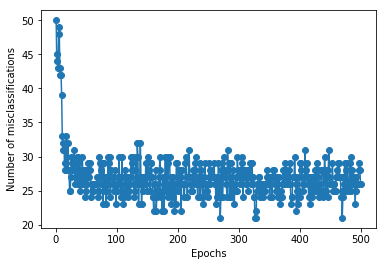

In [13]:
pn = Perceptron(0.001, 500)
pn.fit(X, y)
plt.plot(range(1, len(pn.errors) + 1), pn.errors, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show()